In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # We manually set the seed for reproducible results, this is not required

# Challenge 1

"Ghostie" produces output in {0,1}

If the hypothesis is **false** the outcome is uniformly distributed P({0, 1}) = {0.5, 0.5}

If the hypothesis is **true** the probability of a positive outcome is 90% i.e. P({0, 1}) = {0.1, 0.9}

We have taken 4 measurements with the following result: **{1, 1, 1, 1}**

## Task 1

Graph the probability distribution of the number of positive outcomes in a set of 4 measurements for both of the underlying distributions (**true** and **false** cases)

In [2]:
# randint is a function that produces a uniformly distributed random integer 
# more information in https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html#numpy.random.randint

def random_generator_false(n = 4):
    return np.random.randint(2, size = n)

def test_random_generator(random_generator_function, n = 15):
    # first input argument is a function!
    
    print(f"Calling the function '{random_generator_function.__name__}' {n} times")

    for i in range(n):
        sample = random_generator_false()
        print(f"---> {sample} positive outcomes: {sum(sample)}")
        
test_random_generator(random_generator_false)

Calling the function 'random_generator_false' 15 times
---> [0 1 1 0] positive outcomes: 2
---> [1 1 1 1] positive outcomes: 4
---> [1 1 1 0] positive outcomes: 3
---> [0 1 0 0] positive outcomes: 1
---> [0 0 0 1] positive outcomes: 1
---> [0 1 1 0] positive outcomes: 2
---> [0 1 1 1] positive outcomes: 3
---> [1 0 1 0] positive outcomes: 2
---> [1 0 1 1] positive outcomes: 3
---> [0 1 1 0] positive outcomes: 2
---> [0 1 0 1] positive outcomes: 2
---> [1 1 1 1] positive outcomes: 4
---> [0 1 0 1] positive outcomes: 2
---> [1 1 1 0] positive outcomes: 3
---> [1 0 0 1] positive outcomes: 2


Number of samples: 10000 each with size 4
counts: 0: 6.14%
counts: 1: 24.60%
counts: 2: 38.13%
counts: 3: 25.02%
counts: 4: 6.11%


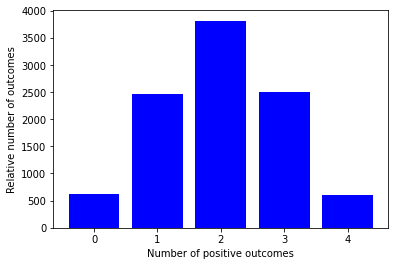

In [3]:
def plot_discrete_distribution(samples, color="blue"):
    
    # plt.hist(samples) # We can plot a simple histogram

    # We can also plot a bar chart which looks better for discrete distributions (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

    # The python standard library (https://docs.python.org/3/library/) has many useful features!

    if np.isscalar(samples[0]):
        # each entry in samples contains the number of positive outcomes i.e. samples[0] = 3
        sample_size = np.max(samples)
        samples_count = samples
    else:
        # each entry in samples is a container with 1 or 0 depending on the outcome i.e. samples[0] = [1, 0, 1, 1]
        sample_size = len(samples[0])
        print(f"Number of samples: {len(samples)} each with size {sample_size}")
        samples_count = [sum(sample) for sample in samples] # list of number of positive outcomes
    
    unique, counts = np.unique(samples_count, return_counts=True)
    # build a dictionary
    counts = {unique[i]: counts[i] for i in range(len(unique))}
    
    values_not_sampled = [key for key in range(sample_size) if key not in counts] # some values may not be sampled due to low statistics, we add it manually to key the graph pretty
    for value in values_not_sampled:
        counts[value] = 0
    
    [print(f"counts: {key}: {counts[key] / len(samples) * 100 :0.2f}%") for key in sorted(counts.keys())]

    plt.bar(counts.keys(), counts.values(), color = color)

    plt.xlabel("Number of positive outcomes")
    plt.ylabel("Relative number of outcomes")

    plt.show()
    
    
size = 4 # size of an individual sample

n = 10000 # number of samples

samples = [random_generator_false(size) for i in range(n)]

plot_discrete_distribution(samples, color="blue")

In the case of the **true** hypothesis we need to construct our random generator function

In [4]:
def random_generator_true(n = 4):
    sample = np.random.uniform(size = n) # n U(0,1) distributed random numbers
    sample = sample < 0.9                # now we convert it to a boolean array
    return sample + 0                    # this is a funny way to convert a boolean array to a int array

test_random_generator(random_generator_true)

Calling the function 'random_generator_true' 15 times
---> [1 1 1 1] positive outcomes: 4
---> [0 1 1 0] positive outcomes: 2
---> [0 1 0 0] positive outcomes: 1
---> [0 0 1 0] positive outcomes: 1
---> [0 1 1 1] positive outcomes: 3
---> [1 1 1 1] positive outcomes: 4
---> [0 0 0 0] positive outcomes: 0
---> [0 1 0 1] positive outcomes: 2
---> [0 0 1 0] positive outcomes: 1
---> [0 0 1 1] positive outcomes: 2
---> [0 1 1 1] positive outcomes: 3
---> [0 1 0 0] positive outcomes: 1
---> [0 1 1 0] positive outcomes: 2
---> [0 1 0 1] positive outcomes: 2
---> [1 0 0 1] positive outcomes: 2


Number of samples: 10000 each with size 4
counts: 0: 0.04%
counts: 1: 0.32%
counts: 2: 4.60%
counts: 3: 28.97%
counts: 4: 66.07%


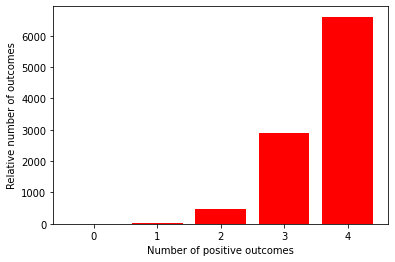

In [5]:
samples = [random_generator_true(size) for i in range(n)]

plot_discrete_distribution(samples, color="red")

## Binomial Distribution

The same can be calculated with a binomial distribution `B(n,p)` with `n` the sample size (`n=4`) and `p` the probability of success (`p=0.5` for the "false" case and `p=0.9` for the "true" case)

counts: 0: 5.79%
counts: 1: 25.56%
counts: 2: 37.07%
counts: 3: 25.03%
counts: 4: 6.55%


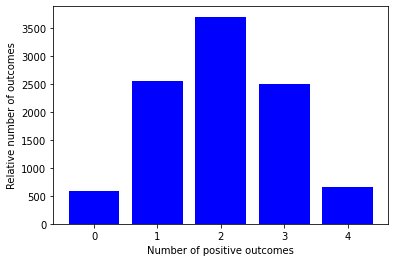

counts: 0: 0.03%
counts: 1: 0.45%
counts: 2: 4.86%
counts: 3: 29.23%
counts: 4: 65.43%


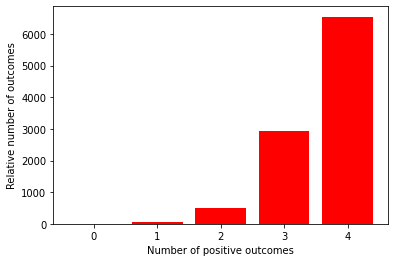

In [6]:
from scipy.stats import binom

n = 4

p = 0.5
sample_false = binom.rvs(n, p, size=10000)
plot_discrete_distribution(sample_false, color="blue")

p = 0.9
sample_true = binom.rvs(n, p, size=10000)
plot_discrete_distribution(sample_true, color="red")

We can check the speed of our implementation and compare it with the scipy implementation of the binomial distribution.

As you will see, our implementation is much slower, this is because we use python containers (such as lists) instead of numpy ones (such as np.array).

In [7]:
n = 10000

print("Our implementation:")
%timeit [sum(random_generator_true(size)) for i in range(10000)]

print("scipy implementation:")
%timeit binom.rvs(n, 0.9, size=10000)

Our implementation:
97.8 ms ± 603 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
scipy implementation:
864 µs ± 7.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Challenge 1.2

counts: 0: 0.41%
counts: 1: 3.00%
counts: 2: 11.40%
counts: 3: 22.26%
counts: 4: 26.96%
counts: 5: 20.98%
counts: 6: 11.44%
counts: 7: 3.18%
counts: 8: 0.37%


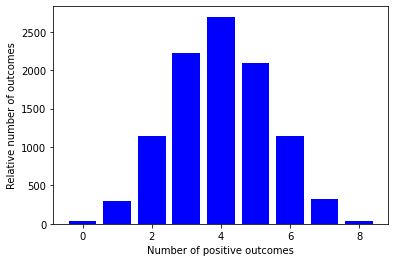

counts: 0: 0.00%
counts: 1: 0.00%
counts: 2: 0.00%
counts: 3: 0.04%
counts: 4: 0.54%
counts: 5: 3.36%
counts: 6: 14.89%
counts: 7: 38.47%
counts: 8: 42.70%


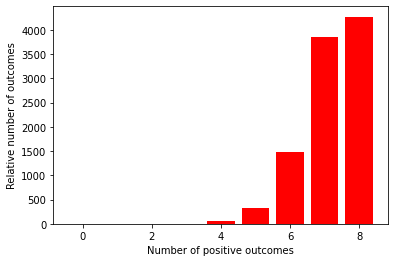

In [8]:
n = 8

p = 0.5
sample_false = binom.rvs(n, p, size=10000)
plot_discrete_distribution(sample_false, color="blue")

p = 0.9
sample_true = binom.rvs(n, p, size=10000)
plot_discrete_distribution(sample_true, color="red")

How many samples (`n`) do I need to take, assuming they all go positive, in order to get a `p-value = 3E-7` i.e. a significance of `5` sigma?

In the following code there are two approaches:
- The slow approach which is just a "brute force" monte carlo using `compute_p_value`. (we need to specify a sample size, the bigger it is, the more accure and slow the result)
- The fast approach which uses the [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.pmf.html](pmf) function. How do you think this works?

n=1 | p-value=5.00e-01
n=2 | p-value=2.50e-01
n=3 | p-value=1.25e-01
n=4 | p-value=6.25e-02
n=5 | p-value=3.12e-02
n=6 | p-value=1.56e-02
n=7 | p-value=7.81e-03
n=8 | p-value=3.91e-03
n=9 | p-value=1.95e-03
n=10 | p-value=9.77e-04
n=11 | p-value=4.88e-04
n=12 | p-value=2.44e-04
n=13 | p-value=1.22e-04
n=14 | p-value=6.10e-05
n=15 | p-value=3.05e-05
n=16 | p-value=1.53e-05
n=17 | p-value=7.63e-06
n=18 | p-value=3.81e-06
n=19 | p-value=1.91e-06
n=20 | p-value=9.54e-07
n=21 | p-value=4.77e-07
n=22 | p-value=2.38e-07
solution: n=22


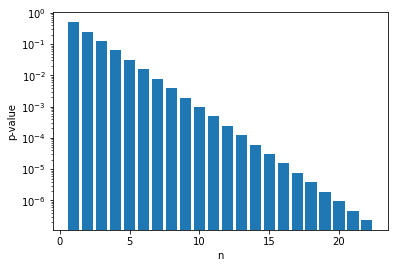

Speed test:
 - Slow:
1.33 s ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 - Fast:
816 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
n = 0
p = 0.5

p_value = 1

n_values = []
p_values = []


def compute_p_value(n, p):
    sample_size = 10000000
    sample_false = binom.rvs(n, p, size=sample_size) # 50%
    # number of "all positive" events
    n_all_positive = len(np.where(sample_false == n)[0])
    p_value = n_all_positive / sample_size
    
    return p_value

def compute_p_value_fast(n, p):
    return binom(n, p).pmf(n)

while p_value > 3E-7:
    n += 1
    
    # comment one of the two to see the speed difference
    #p_value = compute_p_value(n, p)
    p_value = compute_p_value_fast(n, p)

    print(f"n={n} | p-value={p_value:.2e}")
    
    n_values.append(n)
    p_values.append(p_value)
    
    
print(f"solution: n={n}")

plt.bar(n_values, p_values)

plt.xlabel("n")
plt.ylabel("p-value")

plt.yscale("log")

plt.show()

print("Speed test:")
print(" - Slow:")
%timeit compute_p_value(n, p)
print(" - Fast:")
%timeit compute_p_value_fast(n, p)

As we have computed, we would need 22 samples in order for the probability of recording all positive outcomes to be less than `3E-7`